In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Model

from sklearn.model_selection import train_test_split

In [22]:

data = pd.read_csv("mnist_train_small.csv").values

In [23]:

X = data[:, 2:].reshape(-1, 28, 28, 1)
y = data[:, 1]

In [24]:
ohe = OneHotEncoder(categories="auto")

In [25]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [27]:
X[0].shape

(28, 28, 1)

In [28]:
in_layer = Input(shape=[28, 28, 1])
conv_1 = Conv2D(32, (3, 3), activation="relu")(in_layer)
pool_1 = MaxPool2D()(conv_1)
conv_2 = Conv2D(64, (3, 3), activation="relu")(pool_1)
pool_2 = MaxPool2D()(conv_2)
conv_3 = Conv2D(128, (3, 3), activation="relu")(pool_2)
pool_3 = MaxPool2D()(conv_3)
flatten = Flatten()(pool_3)
dense_1 = Dense(200, activation="tanh")(flatten)
dense_2 = Dense(100, activation="tanh")(dense_1)
drop = Dropout(rate=.25)(dense_2)
dense_3 = Dense(50, activation="tanh")(drop)
out = Dense(10, activation="softmax")(dense_3)

In [29]:
model = Model(inputs=[in_layer], outputs=[out])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 128)         0         
__________

In [31]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [32]:

hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 5s 941us/step - loss: 1.6548 - acc: 0.4830
Epoch 2/10
5360/5360 [==============================] - 4s 762us/step - loss: 0.7026 - acc: 0.8366
Epoch 3/10
5360/5360 [==============================] - 4s 755us/step - loss: 0.3796 - acc: 0.9090
Epoch 4/10
5360/5360 [==============================] - 4s 760us/step - loss: 0.2659 - acc: 0.9330
Epoch 5/10
5360/5360 [==============================] - 4s 762us/step - loss: 0.1944 - acc: 0.9528
Epoch 6/10
5360/5360 [==============================] - 4s 758us/step - loss: 0.1632 - acc: 0.9586
Epoch 7/10
5360/5360 [==============================] - 4s 744us/step - loss: 0.1372 - acc: 0.9644
Epoch 8/10
5360/5360 [==============================] - 4s 746us/step - loss: 0.1111 - acc: 0.9716
Epoch 9/10
5360/5360 [==============================] - 4s 753us/step - loss: 0.1011 - acc: 0.9752
Epoch 10/10
5360/5360 [==============================] - 5s 858us/step - loss: 0.0857 - acc: 0.9784


In [33]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 331us/step


[0.12333034392107617, 0.9613636363636363]

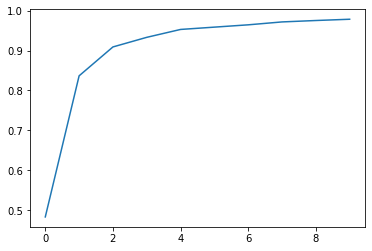

In [34]:
plt.plot(hist.history["acc"])

In [35]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [36]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [37]:
m2.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 369us/step


[0.12333034392107617, 0.9613636363636363]

In [38]:
import cv2

array([[5, 6, 0, 3, 1, 9, 7, 8, 4, 2]], dtype=int64)

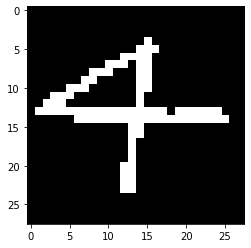

In [39]:
img = cv2.imread("nums/four.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
invert = (small < 100).astype(int) * 255
plt.imshow(invert, cmap="gray")
np.argsort(model.predict(np.array([invert.reshape(28, 28, 1)])), axis=1)